In [4]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt 
import yfinance as yf

In [5]:
bitcoin_data = yf.download('BTC-USD', start='2010-01-01') 
bitcoin_data

[*********************100%%**********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2014-09-17,465.864014,468.174011,452.421997,457.334015,457.334015,21056800
2014-09-18,456.859985,456.859985,413.104004,424.440002,424.440002,34483200
2014-09-19,424.102997,427.834991,384.532013,394.795990,394.795990,37919700
2014-09-20,394.673004,423.295990,389.882996,408.903992,408.903992,36863600
2014-09-21,408.084991,412.425995,393.181000,398.821014,398.821014,26580100
...,...,...,...,...,...,...
2024-04-29,63106.363281,64174.878906,61795.457031,63841.121094,63841.121094,26635912073
2024-04-30,63839.417969,64703.332031,59120.066406,60636.855469,60636.855469,37840840057
2024-05-01,60609.496094,60780.500000,56555.292969,58254.011719,58254.011719,48439780271


In [6]:
# Calculate moving averages
def calculate_moving_average(data, window):
    return data['Close'].rolling(window=window).mean()

In [7]:
# Calculate Fibonacci retracement levels
def calculate_fibonacci_retracement(data, level):
    high = data['High'].max()
    low = data['Low'].min()
    diff = high - low
    retracement = high - (diff * level)
    return retracement

In [8]:
# Calculate RSI (Relative Strength Index)
def calculate_rsi(data, window):
    close_prices = data['Close']
    price_diff = close_prices.diff()
    up_prices = price_diff.where(price_diff > 0, 0)
    down_prices = -price_diff.where(price_diff < 0, 0)
    avg_gain = up_prices.rolling(window).mean()
    avg_loss = down_prices.rolling(window).mean()
    rs = avg_gain / avg_loss
    rsi = 100 - (100 / (1 + rs))
    return rsi

In [9]:
# Calculate MACD (Moving Average Convergence Divergence)
def calculate_macd(data, fast_period, slow_period, signal_period):
    close_prices = data['Close']
    ema_fast = close_prices.ewm(span=fast_period).mean()
    ema_slow = close_prices.ewm(span=slow_period).mean()
    macd_line = ema_fast - ema_slow
    signal_line = macd_line.ewm(span=signal_period).mean()
    histogram = macd_line - signal_line
    return macd_line, signal_line, histogram 

In [10]:
# Calculate Bollinger Bands
def calculate_bollinger_bands(data, window, std_dev):
    close_prices = data['Close']
    rolling_mean = close_prices.rolling(window).mean()
    rolling_std = close_prices.rolling(window).std()
    upper_band = rolling_mean + (rolling_std * std_dev)
    lower_band = rolling_mean - (rolling_std * std_dev)
    return upper_band, lower_band

In [11]:
# Backtest the strategy
def backtest_strategy(data):
    # Calculate technical indicators
    data['SMA_50'] = calculate_moving_average(data, 50)
    data['SMA_200'] = calculate_moving_average(data, 200)
    data['Fib_0.382'] = calculate_fibonacci_retracement(data, 0.382)
    data['RSI'] = calculate_rsi(data, 14)
    data['MACD'], data['Signal'], data['Histogram'] = calculate_macd(data, 12, 26, 9)
    data['UpperBand'], data['LowerBand'] = calculate_bollinger_bands(data, 20, 2)

    # Generate trading signals
    data['Signal'] = np.where(data['SMA_50'] > data['SMA_200'], 1, -1)
    data['Signal'] = np.where((data['Close'] < data['Fib_0.382']) & (data['RSI'] < 30), 1, data['Signal'])
    data['Signal'] = np.where(data['Histogram'] > 0, 1, data['Signal'])
    data['Signal'] = np.where(data['Close'] > data['UpperBand'], -1, data['Signal'])
    data['Signal'] = np.where(data['Close'] < data['LowerBand'], 1, data['Signal'])

    # Calculate daily returns
    data['Return'] = data['Close'].pct_change()

    # Calculate cumulative returns
    data['CumulativeReturn'] = (1 + data['Return']).cumprod()

    return data 

In [12]:
# Plot the cumulative returns
def plot_cumulative_returns(data):
    plt.figure(figsize=(10, 6))
    plt.plot(data.index, data['CumulativeReturn'])
    plt.title('Bitcoin Cumulative Returns')
    plt.xlabel('Date')
    plt.ylabel('Cumulative Return')
    plt.xticks(rotation=45)
    plt.grid(True)
    plt.show()

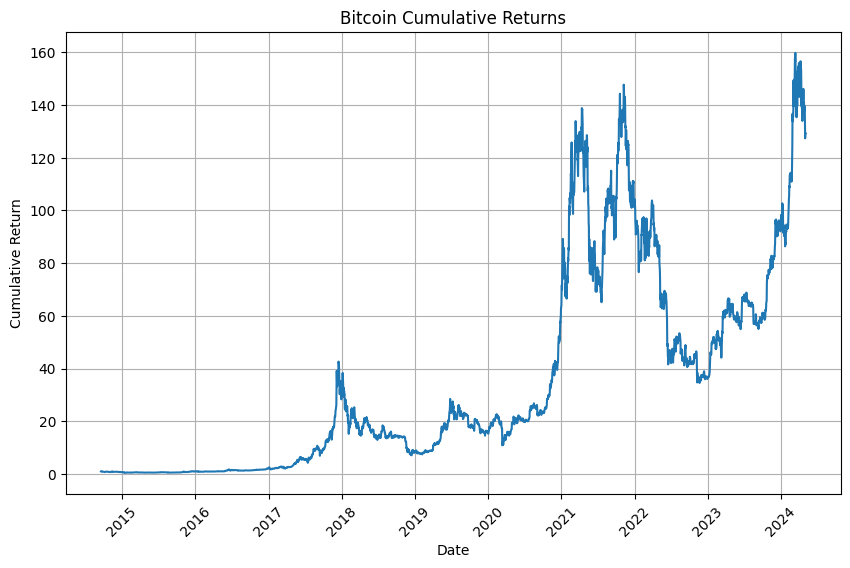

In [13]:
# Run the backtest and plot the results
backtested_data = backtest_strategy(bitcoin_data)
plot_cumulative_returns(backtested_data)